In [27]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from matplotlib import pyplot
# pyplot.style.use('dark_background')

In [28]:
# clean the data
data = pd.read_csv("./StudentData2.csv")
data = data[data.id.apply(lambda x: len(str(x)) == 6)]
data = data[(data.gender == 1) | (data.gender == 2)]
data = data[(data.age >= 18) & (data.age <= 80)]
data = data[(data.gpa >= 0)  &(data.gpa <= 4.0) & (data.gpa.notnull())]
data = data[(data.sat >=0) & (data.sat <= 1600) & (data.sat.notnull())]
data = data[data.section.notnull()]
data = data[(data.final >= 0) & (data.final <= 100) & (data.final.notnull())]
data = data[(data.project >= 0) & (data.project <= 100) & (data.project.notnull())]

with open("../GU_bootcamp/OUTFILE.txt","w+") as f:
    data.to_csv("../GU_bootcamp/OUTFILE.txt",sep="\t")


In [29]:
data.head()

,id,gender,age,gpa,sat,section,final,project
0,618027,2,27,2.59,700.0,3.0,75,69
1,691694,2,33,3.49,950.0,4.0,89,81
2,661363,2,31,3.78,1172.0,5.0,75,86
4,624861,2,27,3.47,1099.0,3.0,89,94
5,673174,2,32,3.36,1115.0,5.0,87,89


In [30]:
# check if there is a significant difference in final scores between the two gender groups
male_final = data[data.gender == 1].final
female_final = data[data.gender == 2].final
statistic, p_value = ttest_ind(male_final,female_final)
print("the t statistic is {:.2f}".format(statistic))
print("the p value is {:.2f}".format(p_value))
# I find that the statistic is -1.64 and the p value is 0.12
# Because p value > 0.05, I think that there is no difference between both of them according to the t_test

with open( "/Users/junjiexie/GU_bootcamp/OUTFILE.txt","a+") as f:
    f.write("\n\n")
    f.write("check if there is a significant difference in final scores between the two gender groups\n")
    f.write("the t statistic is {:.2f}\n".format(statistic))
    f.write("the p value is {:.2f}\n".format(p_value))
    f.write("I find that the statistic is -1.64 and the p value is 0.\n")
    f.write("Because p value > 0.05, I think that there is no difference between genders according to the t_test\n\n")

the t statistic is -1.64
the p value is 0.12


In [31]:
# check if there is a correlation between the final and the project(Pearson correlation)
pearson_coefficient, perarson_p_value = pearsonr(x=data.final, y=data.project)
print("the pearsonr coefficient is {:.2f}".format(pearson_coefficient))
print("the pearson p value is {:.2f}".format(perarson_p_value))
# I find that the pearson correlation is 0.89, meaning that both of them have a significant positive correlation
# And the pearson P_value < 0.05, I think that there is a significant linear correlation between the final and the project

with open( "/Users/junjiexie/GU_bootcamp/OUTFILE.txt","a+") as f:
    f.write("check if there is a correlation between the final and the project(Pearson correlation)\n")
    f.write("the pearsonr coefficient is {:.2f}\n".format(pearson_coefficient))
    f.write("the pearson p value is {:.2f}\n".format(perarson_p_value))
    f.write("the pearson P_value < 0.05\n, I think that there is a significant linear correlation between the final and the project\n")
    f.write("I find that the pearson correlation is 0.89, meaning that both of them have a significant positive correlation\n\n")

the pearsonr coefficient is 0.90
the pearson p value is 0.00


In [32]:
mod = ols('final ~ section', data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
# I find that the P_value is 0.63 which is far higher than 0.05, there is a significant difference between the 5 sections for final score

              sum_sq    df         F    PR(>F)
section     51.44735   1.0  0.234813  0.632767
Residual  4820.17765  22.0       NaN       NaN


<AxesSubplot:title={'center':'final'}, xlabel='section'>

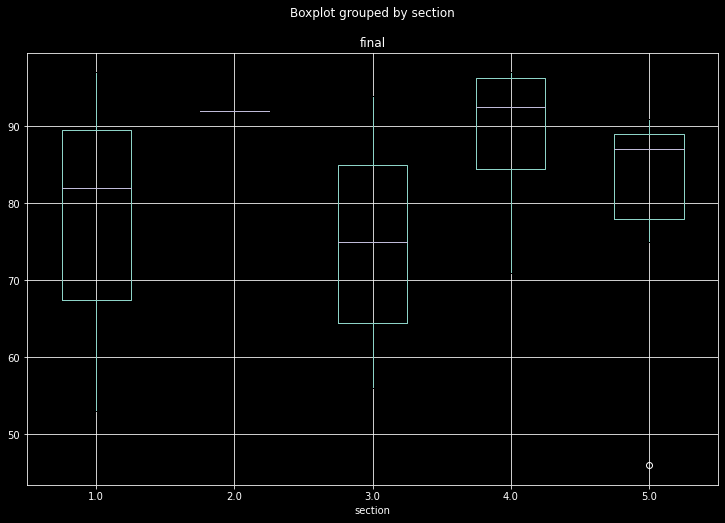

In [33]:
data.boxplot("final", by="section", figsize=(12,8))

In [34]:
# the project, the gpa, and the sat

def getDataDescribe(data:pd.DataFrame,columns:list):
    for i in columns:
        mean = np.mean(data[i])
        max = np.max(data[i])
        min = np.min(data[i])
        var = np.var(data[i])
        std = np.std(data[i])
        median = np.percentile(data[i],50)
        print("now the column is {}\n".format(i))
        print("the mean is {:.2f} and the median is {:.2f} \n the max is {:.2f} and the min is {:.2f} \n the var is {:.2f} and the std is {:.2f}".format(mean, median, max, min, var, std))
        print("\n")

        with open( "/Users/junjiexie/GU_bootcamp/OUTFILE.txt","a+") as f:
            f.write("now the column is {}\n".format(i))
            f.write("the mean is {:.2f} and the median is {:.2f} \n the max is {:.2f} and the min is {:.2f} \n the var is {:.2f} and the std is {:.2f}\n".format(mean, median, max, min, var, std))
            f.write("\n\n")

getDataDescribe(data, ["project","gpa","sat"])

now the column is project

the mean is 82.00 and the median is 86.50 
 the max is 99.00 and the min is 52.00 
 the var is 163.08 and the std is 12.77


now the column is gpa

the mean is 3.28 and the median is 3.37 
 the max is 3.90 and the min is 1.78 
 the var is 0.18 and the std is 0.43


now the column is sat

the mean is 1050.17 and the median is 1113.00 
 the max is 1440.00 and the min is 3.00 
 the var is 94852.31 and the std is 307.98




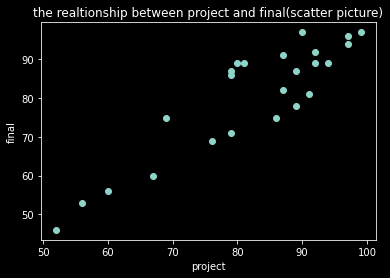

In [35]:
plt.scatter(data.project,data.final)
plt.xlabel("project")
plt.ylabel("final")
plt.title("the realtionship between project and final(scatter picture)")
plt.show()

Text(0.5, 1.0, 'the gpa level and the gpa point(bar picture)')

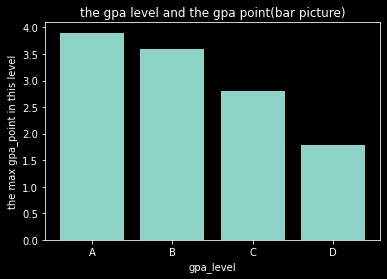

In [36]:
group_names = ["F","D","C","B","A"]
bins = [0.00,1.00,2.00,3.00,3.70,4.00]
bin_result = pd.cut(sorted(data.gpa,reverse=True),bins,labels=group_names)
plt.bar(bin_result, sorted(data.gpa,reverse=True))
plt.xlabel("gpa_level")
plt.ylabel("the max gpa_point in this level")
plt.title("the gpa level and the gpa point(bar picture)")



In [ ]:
import pandas as pd
def calculate(input:str)
    print(input)